**Iris example multiclassification with categorical labels**

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from keras.utils import np_utils
from keras.wrappers.scikit_learn import KerasClassifier
from keras.models import Sequential
from keras.layers import Dense

from sklearn import datasets
from sklearn.utils.multiclass import unique_labels
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

Using TensorFlow backend.


In [9]:
def Analyze_training(h):
# summarize history for accuracy
   plt.plot(h.history['acc'])
   plt.plot(h.history['val_acc'])
   plt.title('model accuracy')
   plt.ylabel('accuracy')
   plt.xlabel('epoch')
   plt.legend(['train', 'test'], loc='upper left')
   plt.show()
# summarize history for loss
   plt.plot(h.history['loss'])
   plt.plot(h.history['val_loss'])
   plt.title('model loss')
   plt.ylabel('loss')
   plt.xlabel('epoch')
   plt.legend(['train', 'test'], loc='upper left')
   plt.show()
   return

    Load Iris Dataset using Keras module

In [3]:
iris = datasets.load_iris()
X = iris.data
y = iris.target
categ_y = np_utils.to_categorical(y)
class_names = iris.target_names

split = int(0.90 * X.shape[0])

x_train = X[:split,:]
y_train = categ_y[:split,:]

x_test = X[split:,:]
y_test = categ_y[split:,:]

print("class_names: ", class_names)
print("categorical classes:", np.unique(categ_y, axis=0))

class_names:  ['setosa' 'versicolor' 'virginica']
categorical classes: [[0. 0. 1.]
 [0. 1. 0.]
 [1. 0. 0.]]


Network definition

In [4]:
def network_model():
	# create model
	model = Sequential()
	model.add(Dense(128, input_dim=4, activation='relu'))
	model.add(Dense(3, activation='softmax'))
	# Compile model
	model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
	return model

Run Network & present results

In [5]:
my_network = network_model()
hist = my_network.fit(x_train,y_train, epochs=15, shuffle=True,batch_size=10,validation_data=(x_test, y_test))

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
Train on 135 samples, validate on 15 samples
Epoch 1/15
135/135 [==============================] - 7s 53ms/step - loss: 1.2682 - acc: 0.4074 - val_loss: 1.4256 - val_acc: 0.0000e+00
Epoch 2/15
135/135 [==============================] - 0s 1ms/step - loss: 0.8902 - acc: 0.6296 - val_loss: 0.6307 - val_acc: 1.0000
Epoch 3/15
135/135 [==============================] - 0s 2ms/step - loss: 0.7760 - acc: 0.7037 - val_loss: 0.8271 - val_acc: 0.4667
Epoch 4/15
135/135 [==============================] - 0s 2ms/step - loss: 0.6760 - acc: 0.8593 - val_loss: 0.7258 - val_acc: 0.9333
Epoch 5/15
135/135 [==============================] - 0s 2ms/step - loss: 0.6051 - acc: 0.8741 - val_loss: 0.7111 - val_acc: 0.7333
Epoch 6/15
135/135 [==============================] - 0s 1ms/step - loss: 0.5581 - acc: 0.8074 - val_loss: 0.7469 - val_acc: 0.4667
Epoch 7/15
135/135 [==================

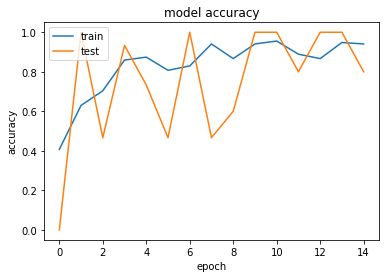

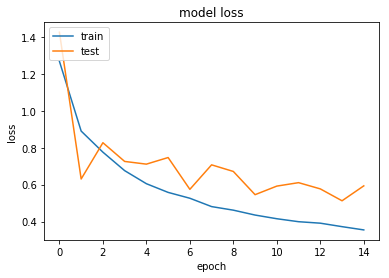

In [11]:
Analyze_training(hist)